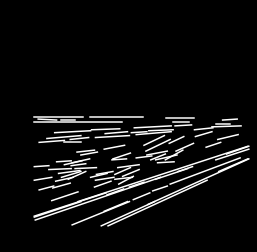

In [219]:
import numpy as np

from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.image as mpimg
import networkx as nx
import cv2
import os, glob
from skimage import io
import torch


'''

######################### Classic straight-line Hough transform ###################################
'''

################# Line finding using the Probabilistic Hough Transform   #########################
folder = '/home/project/images/sorted_data/noUtility/'
filename = os.listdir(folder)[12]

image = mpimg.imread(folder+filename)
#imgplot = plt.imshow(image)

image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edges = canny(image)#, 3, 3, 10)
lines = probabilistic_hough_line(edges, threshold=50, line_length=15,
                                 line_gap=2)

plt.style.use('dark_background')
plt.axes().set_aspect('equal')
plt.xlim((0, image.shape[1]))
plt.ylim((image.shape[0], 0))

for line in lines:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]),'w')
#plt.figure(figsize=(16,4))
plt.axis('off')
plt.close()

plt.savefig('test.jpg', bbox_inches='tight')

img_np = np.max(io.imread('test.jpg').astype(np.uint8), axis=2)[8:232,32:256]
img_bin = torch.from_numpy(255*(img_np > 255/2))

In [92]:
print(np.max(img_np, axis=0)[32:256])
print(np.max(img_np, axis=1)[8:232])

[  4 144 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 253 165   4   4   3   4   6   5]
[  6   5 143 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 